In [92]:
import seaborn as sns
import pandas as pd
import numpy as np
sns.set(style="darkgrid")

In [22]:
tips = pd.read_csv("/home/zjw/zjw/seaborn-data/tips.csv")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


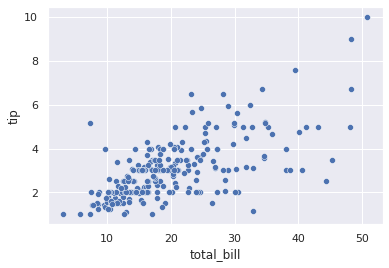

In [38]:
ax = sns.scatterplot(x="total_bill", y="tip", data=tips)

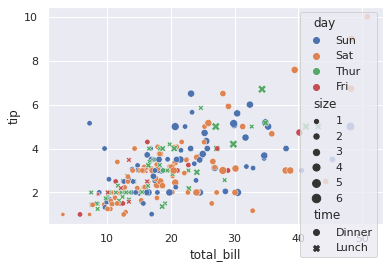

In [46]:
ax = sns.scatterplot(x="total_bill", y="tip", hue="day", 
                     size="size", style="time", data=tips)

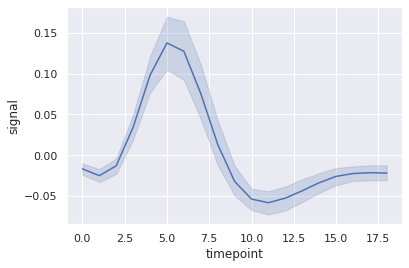

In [53]:
fmri = pd.read_csv("/home/zjw/zjw/seaborn-data/fmri.csv")
fmri.head()
ax = sns.lineplot(x="timepoint", y="signal", data=fmri)

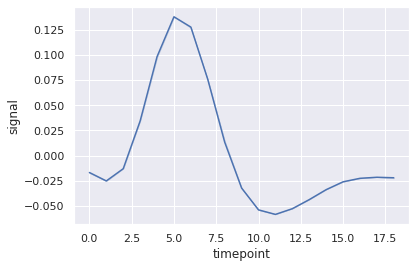

In [54]:
# ci可以消除阴影
ax = sns.lineplot(x="timepoint", y="signal", ci=0, data=fmri)  

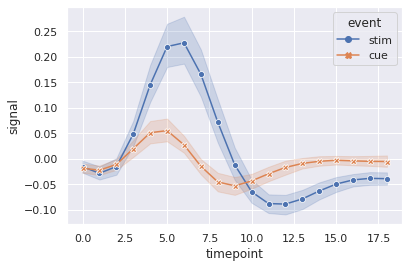

In [57]:
ax = sns.lineplot(x="timepoint", y="signal", hue="event", 
                  style="event", markers=True, dashes=False, data=fmri)

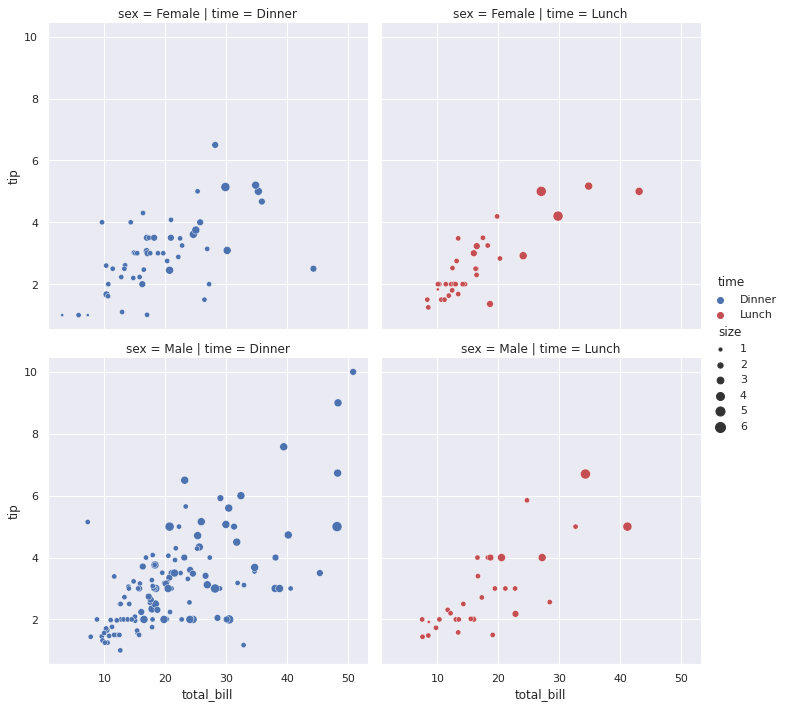

In [59]:
ax = sns.relplot(x="total_bill", y="tip", hue="time", 
                 size="size",palette=["b", "r"], 
                 sizes=(10, 100), col="time", row="sex", data=tips)

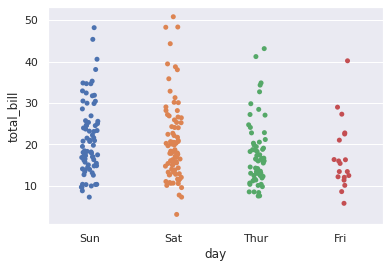

In [78]:
# 以下分类散点图
# seaborn.stripplot(x=None, y=None, hue=None, data=None, order=None, 
# hue_order=None, jitter=True, dodge=False, orient=None, color=None, 
# palette=None, size=5, edgecolor='gray', linewidth=0, ax=None, **kwargs)
# x, y, data输入的数据
# order: 用order参数进行筛选分类类别
# jitter: 抖动项
# dodge: 重叠区域是否分开，当使用hue时，将其设置为True
# orient: "v" | "v" 垂直或者水平
ax = sns.stripplot(x="day", y="total_bill", dodge=True, orient="v", data=tips)

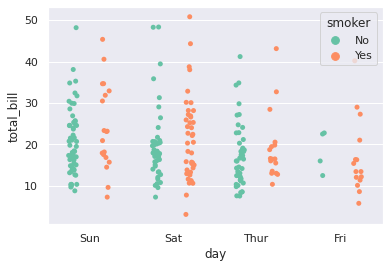

In [72]:
ax = sns.stripplot(x="day", y="total_bill", hue="smoker", data=tips,
        jitter=True, palette="Set2", dodge=True)

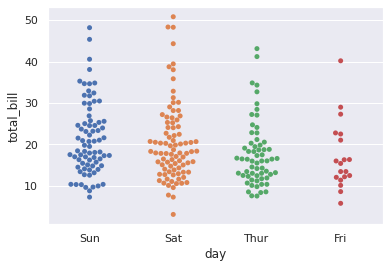

In [81]:
# 分布密度函数
# 类似与stripplot,对点进行了调整（沿着分类轴），不会发生重叠，
# 可以更好地表示值的分布，对于大量数据的观测不利
ax = sns.swarmplot(x="day", y="total_bill", data=tips)

/home/zjw/anaconda3/envs/pytorch/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 8.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


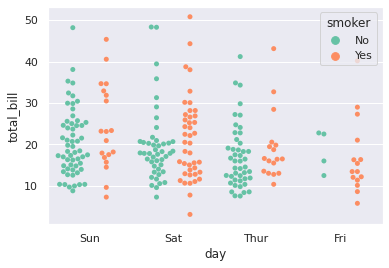

In [82]:
ax = sns.swarmplot(x="day", y="total_bill", hue="smoker", data=tips, palette="Set2", dodge=True)

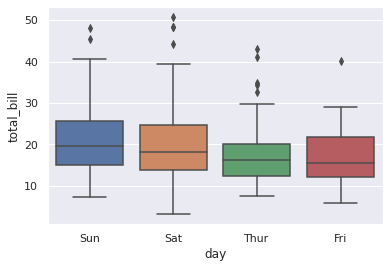

In [83]:
# Categorical distribution plits 分类分布图
# boxplot 箱线图，便于在变量之间或跨类别变量级别比较的方式，显示定量的数据分布情况。
# 框显示数据集的四分位数，线显示的其余分布，
# 能显示出一组数据的最大值，最小值，中位数及上下四分位数
# 使用四分位数范围函数的方法可以确定“离群值”的点
# saturation: 饱和度, 可设置为1
# width: float, 控制箱型的宽度大小
# flitersize: float, 用于只是离群值观察的标记大小
# whis: 可理解为异常值的上限IQR比例
# notch...
ax = sns.boxplot(x="day", y="total_bill", data=tips)

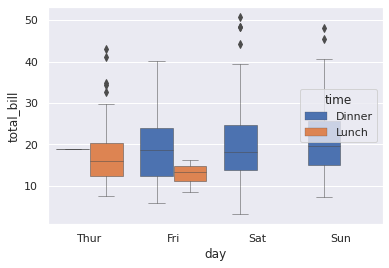

In [85]:
ax = sns.boxplot(x="day", y="total_bill", hue="time", data=tips,
                linewidth=0.5, order=["Thur", "Fri", "Sat", "Sun"],
                 saturation=1, )

In [86]:
# violinplot 小提琴图
# violinplot与boxplot类似，
# 箱线图展示了定来那个数据在一个或多个分类变量的多个层次上的分布， 这些分布可以进行比较
# 箱型图中的组建都是基于实际数据点，小提琴绘图以基础的和密度估计为特征，
# 通过小提琴图可以知道那些位置的密度比较高。
# 在途中白点是中位数，黑色盒型的范围是下四分位点到上四分位点，细黑线表示须。
# 外部形状即为核密度估计
# seaborn.violinplot(x=None, y=None, hue=None, data=None, order=None, 
# hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, gridsize=100, 
# width=0.8, inner='box', split=False, dodge=True, orient=None, linewidth=None, 
# color=None, palette=None, saturation=0.75, ax=None, **kwargs)

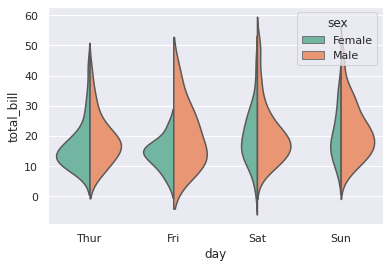

In [90]:
# bw: "scott", "silverman", float 控制拟合程度。
# 算内核带宽时，可以引用规则的名称（“scott", "silverman")或者使用比例（float）。
# 实际内核大小将通过比例乘以每个bin内数据的标准差来确定
# cut: 空值外壳的延伸超过极值点的密度，float
# scale: "area", "count", "width", 用来缩放每把小提琴宽度的方法
# scale_hue: 当使用hut分类后被设置为True, 确定是否在分组变量进行缩放
# gridsize：设置小提琴图的平滑图，越高越平滑
# inner: "box", "quartile", "point", "stick", None, 小提琴内部数据点的表示
# 分别表示：箱子，四分位，点，数据线和不表示
# split: 是否拆分，当设置为True时，绘制经hue分类的每个级别画出一半的小提琴
ax = sns.violinplot(x="day", y="total_bill", hue="sex", data=tips,
                   palette="Set2", split=True, scale="count",
                    order=["Thur", "Fri", "Sat", "Sun"], inner=None)

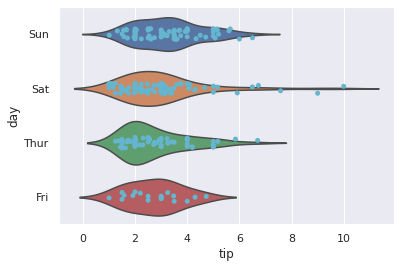

In [93]:
ax = sns.violinplot(x="tip", y="day", data=tips, inner=None, whis=np.inf)
ax = sns.stripplot(x="tip", y="day", data=tips, jitter=True, color="c")

/home/zjw/anaconda3/envs/pytorch/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 12.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/zjw/anaconda3/envs/pytorch/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 13.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/zjw/anaconda3/envs/pytorch/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


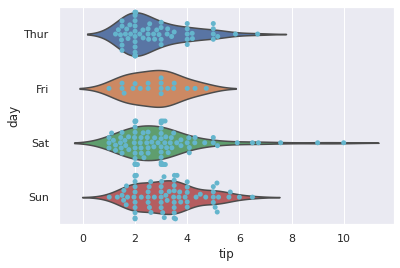

In [95]:
ax = sns.violinplot(x="tip", y="day", order=["Thur", "Fri", "Sat", "Sun"], data=tips, inner=None, whis=np.inf)
ax = sns.swarmplot(x="tip", y="day", order=["Thur", "Fri", "Sat", "Sun"], data=tips, color="c")

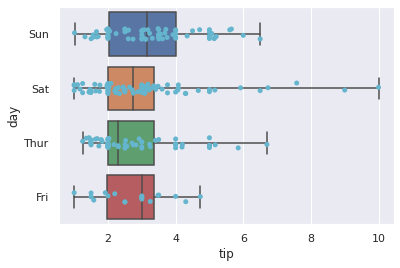

In [96]:
ax = sns.boxplot(x="tip", y="day", data=tips, whis=np.inf)
ax = sns.stripplot(x="tip", y="day", data=tips, jitter=True, color="c")

/home/zjw/anaconda3/envs/pytorch/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 11.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/zjw/anaconda3/envs/pytorch/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 11.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/zjw/anaconda3/envs/pytorch/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


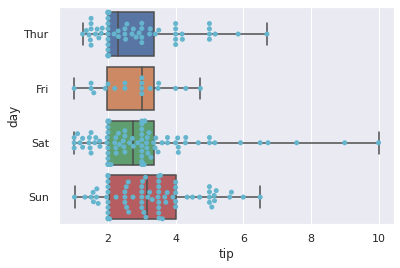

In [98]:
ax = sns.boxplot(x="tip", y="day", order=["Thur", "Fri", "Sat", "Sun"], data=tips, whis=np.inf)
ax = sns.swarmplot(x="tip", y="day", order=["Thur", "Fri", "Sat", "Sun"], data=tips, color="c")

In [99]:
# Categorical estimate plots 分类估计图
# barplot
# 条行图表示数值变量与每个矩形高度的中心趋势的估计值， 用举行图表示点估计和置信度区间
# 并使用误差线提供关于估计值附近的不确定性的一些只是。
# seaborn.barplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, 
# estimator=<function mean>, ci=95, n_boot=1000, units=None, orient=None, 
# color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None,
# capsize=None, dodge=True, ax=None, **kwargs)

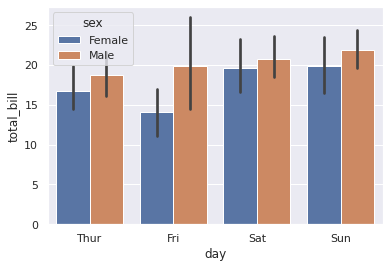

In [101]:
# estimator: 用于估计每个分类箱内的统计函数，默认为mean。也可以设置为np.median/np.std/np.var
# order: 选择和控制顺序， 例如order=["Sat", "Sun"]
# ci: 允许的误差的范围（控制误差棒的百分比， 在0-100之间），若填写“sd”则用标准误差，默认为95,
# 也可以设置为None
# capsize: 设置误差棒帽条（上下两根横线）的宽度，float
# saturation: 饱和度
# errcolor: 表示置信区间的线条的颜色
# errwidth: float, 设置误差条线（和帽）的厚度

ax = sns.barplot(x="day", y="total_bill", 
                 order=["Thur", "Fri", "Sat", "Sun"],hue="sex", data=tips)

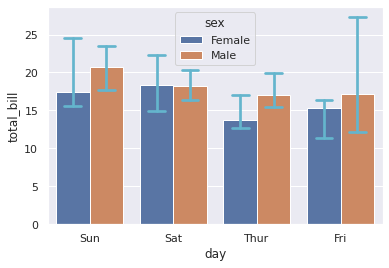

In [103]:
ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips,
                estimator=np.median, capsize=0.2, errcolor='c')

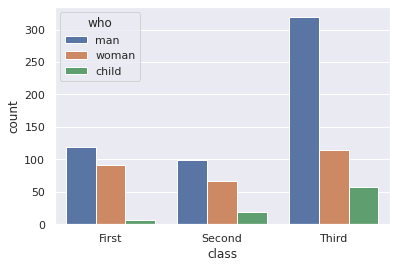

In [107]:
# 计数图
titanic = pd.read_csv("/home/zjw/zjw/seaborn-data/titanic.csv")
ax = sns.countplot(x="class", hue="who",order=["First", "Second", "Third"], data=titanic)

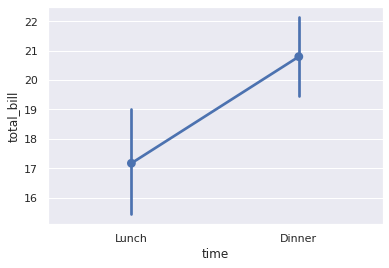

In [109]:
# pointplot 点图
ax = sns.pointplot(x="time", y="total_bill", order=["Lunch", "Dinner"], 
                   data=tips)

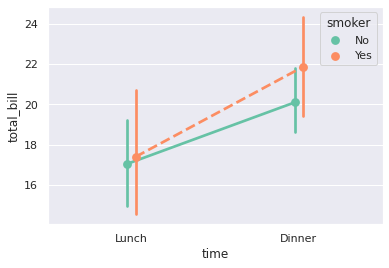

In [115]:
# 代表散点图位置的数值变量的中心趋势估计，并使用误差线提供关于该估计的不确定性的一些指示
# 作用：展现一个分类变量的层次之间的关系如何在第二个分类变量的层次之间比较

ax = sns.pointplot(x="time", y="total_bill", hue="smoker", data=tips,
        estimator=np.median, dodge=True, palette="Set2", # join=False, 取消点与点之间的连线
        order=["Lunch", "Dinner"], makers=["o", "x"], linestyles=["-", "--"])

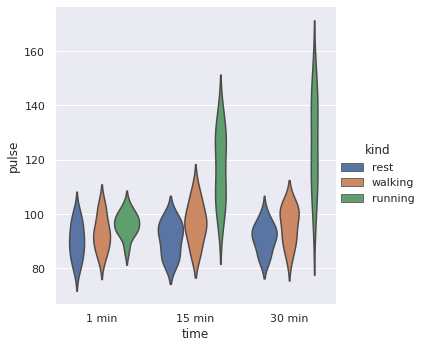

In [116]:
# catplot
# seaborn.catplot(x=None, y=None, hue=None, data=None, row=None, col=None, 
# col_wrap=None, estimator=<function mean>, ci=95, n_boot=1000, units=None, 
# order=None, hue_order=None, row_order=None, col_order=None, kind='strip',
#  height=5, aspect=1, orient=None, color=None, palette=None, legend=True, 
#  legend_out=True, sharex=True, sharey=True, margin_titles=False, 
#  facet_kws=None, **kwargs)
# kind: 默认strip(分布散点图)， 也可以选择“point”， “bar”, "count"
# col, row: 将决定网格的面熟和分类变量，可具体制订
# col_wrap: 指定每行展示的子图个数，但是与row不兼容
# row_order, col_order: 字符串列表，安排行和列，以及推断数据中的对象
# height, aspect: 与图像的大小有关
# sharex, sharey: bool, 'col' or 'row', 是否共享，x, y坐标

exercise = pd.read_csv("/home/zjw/zjw/seaborn-data/exercise.csv")
ax = sns.catplot(x="time", y="pulse", hue="kind", data=exercise, 
                 kind="violin", inner=None)

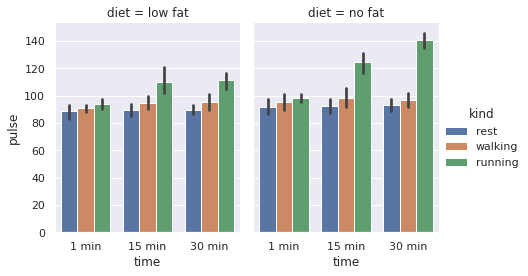

In [117]:
sns.catplot(x="time", y="pulse", hue="kind", kind="bar", col="diet",
            data=exercise, height=4, aspect=0.8)

/home/zjw/anaconda3/envs/pytorch/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


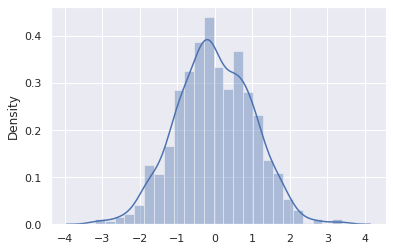

In [126]:
# Distribution plots 分布图
# distplot(直方图)
# seaborn.distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, 
# hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None,
#  vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)
# bins: int或list, 控制直方图的划分，设置矩形图（就是块儿的多少）数量
# 除特殊要求一般默认
# hist: 是否显示方块
# kde: 是否显示和密度估计曲线
# rug: 控制是否生成观测数值的小线条（边际毛毯）
# fit： 控制你和的参数分布图形，能够直观地评估
# 它与观察数据的对应关系（黑色线条为确定的分布）
#     -{hist, kde, rug, fit}_kws: 参数接受字典类型，可以自定定义更多高级的形式
# norm_hist: 若为True, 则直方图高度显示密度而非计算（含有ked图像中默认为True）
# vertical: 放置的方向，如果为真，则观测值位于y-轴上（默认为False, x轴上）

# 设置随机种子，生成1000个符合正态分布的数
np.random.seed(666)
x = np.random.randn(1000)
ax = sns.distplot(x)

/home/zjw/anaconda3/envs/pytorch/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/zjw/anaconda3/envs/pytorch/lib/python3.7/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


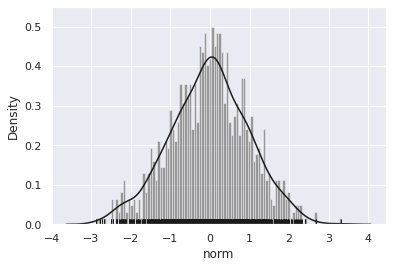

In [134]:
x = np.random.randn(1000)
ax = sns.distplot(x, bins=100, hist=True, kde=True, rug=True,
                 color='k', axlabel="norm")

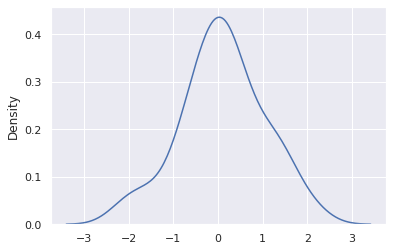

In [138]:
# kedplot 核密度图
# 核密度估计（kernel density estimation）用来估计未知的密度函数，属于非参数检验方法
# seaborn.kdeplot(data, data2=None, shade=False, vertical=False, kernel='gau', 
# bw='scott', gridsize=100, cut=3, clip=None, legend=True, cumulative=False, 
# shade_lowest=True, cbar=False, cbar_ax=None, cbar_kws=None, ax=None, **kwargs)

# data、data2： 表示可以输入双变量，绘制双变量核密度图
# shade: 是否填充阴影，默认不填充
# vertical: 防止方向，如果为真， 则挂测值位于y轴上（默认False, x轴上）
# kernel: {'gau'| 'cos' | 'biw' | 'epa' | 'tri' | 'triw'}。
# 默认高斯核（’gau‘）二元KDE只能使用高斯核
# bw: {'scott' | 'sliverman' | scalar | pair of scalars}。
# 四类和密度带方法，默认scott
# gridsize: 这个参数值的是每个网格里面应该包含有多少个点, 越小网格里面的点越少
# cut: 参数表示，绘制的时候，切除带宽往数轴极限数值的多少
# cumulative: 是否绘制累计分布
# shade_lowest: 是否有最低值渲染，这个参数只有在二位密度图上才有效
# clip: 表示查看部分结果，是一个区间
# cbar: 参数若为True, 则会添加一个颜色棒（只在二元kde图像中采用）
mean, cov = [0, 2], [(1, 0.5), (0.5, 1)]
# 多元正态分布
x, y = np.random.multivariate_normal(mean, cov, size=50).T
ax = sns.kdeplot(x)

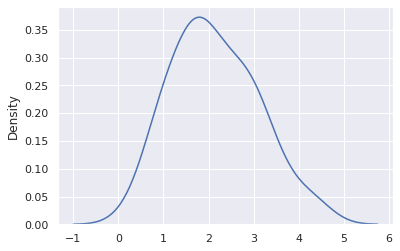

In [139]:
ax = sns.kdeplot(y)

/home/zjw/anaconda3/envs/pytorch/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/zjw/anaconda3/envs/pytorch/lib/python3.7/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


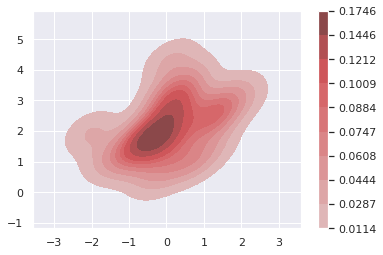

In [142]:
ax = sns.kdeplot(x, y, shade=True, shade_lowest=False, cbar=True, color='r')

/home/zjw/anaconda3/envs/pytorch/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/zjw/anaconda3/envs/pytorch/lib/python3.7/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/home/zjw/anaconda3/envs/pytorch/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/zjw/anaconda3/envs/pytorch/lib/python3.7/site-packages/seaborn/distr

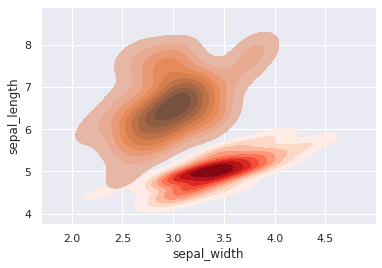

In [150]:
iris = pd.read_csv("/home/zjw/zjw/seaborn-data/iris.csv")
setose = iris.loc[iris.species == 'setosa']
virginica = iris.loc[iris.species == 'virginica']
ax = sns.kdeplot(setose.sepal_width, setose.sepal_length, cmap="Reds",
                shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length, 
                 cmapl="Blues", shade=True, shade_lowest=False)

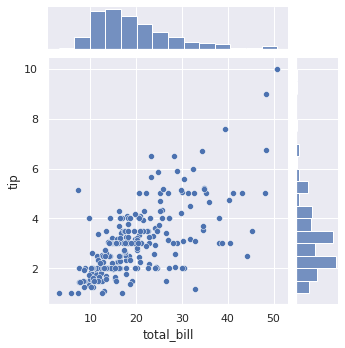

In [152]:
# 联合分布图
# 两个以上随机变量组成的随机向量的概率分布。根据随机变量的不同，联合概率分布的表示形式也不同。
# 对于离散型随机变量，联合概率分布可以以列表的形式表示， 也可以以函数的形式形式表示
# 对于连续型随机变量，联合概率分布通过一定非负函数的积分表示。
# seaborn.jointplot(x, y, data=None, kind='scatter', stat_func=None, color=None, 
# height=6, ratio=5, space=0.2, dropna=True, xlim=None, ylim=None, joint_kws=None,
#  marginal_kws=None, annot_kws=None, **kwargs)
# x, t: 为DataFrame中的列名或者是两组数据，data指向dataframe
# kind: {"scatter" | "reg" | "resid" | "ked" | "hex"}.
# stat_func: 中心图与测边图的比例，越大、中心图占比越大
# dropna: 去除缺失值
# height: 图中的尺度大小（正方形）
# space: 中心图与测边图的间隔大小
# xlim, ylim: x, y的范围
ax = sns.jointplot(x="total_bill", y="tip", data=tips, height=5)

/home/zjw/anaconda3/envs/pytorch/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


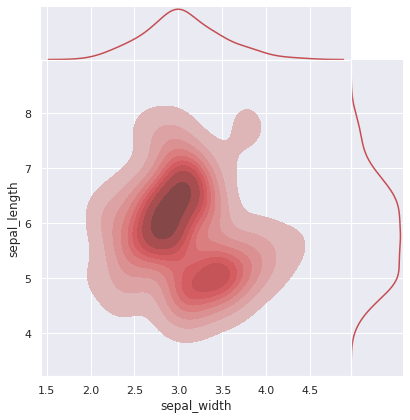

In [154]:
ax = sns.jointplot("sepal_width", "sepal_length", data=iris, kind="kde",
                  space=0, ratio=6, color="r", shade=True)

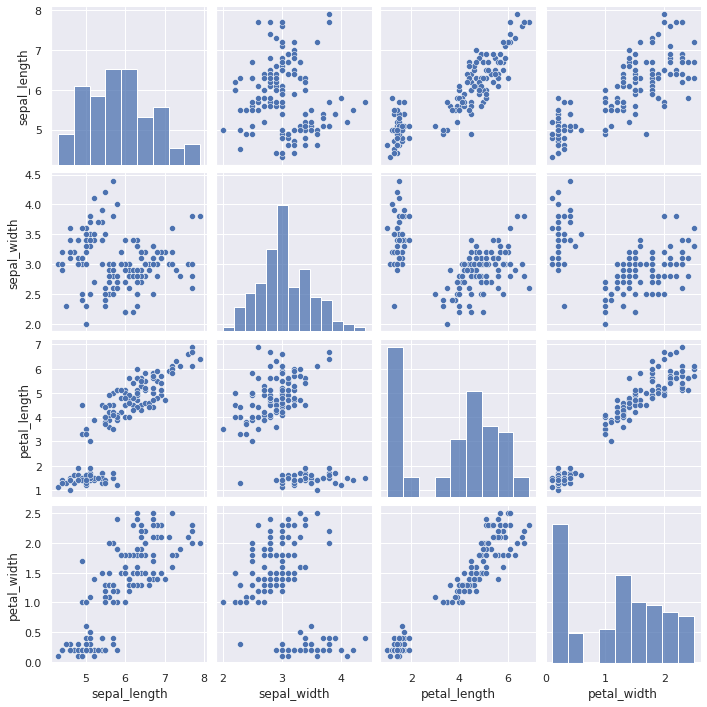

In [155]:
# pair plot（变量关系图）
# 通过数据集中绘制成对关系的图。
# 默认情况下该函数将创建一个轴网格， 这样数据中的每个变量都将通过跨一行的
# y轴和跨单个列的x轴共享。对角轴的处理方式不同，绘制的图显示该列中的变量的
# 数据的单变量分布。此外，还可以在行和列上显示变量子集或绘制不同的变量。
# seaborn.pairplot(data, hue=None, hue_order=None, palette=None, vars=None, 
# x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None,
#  height=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None, 
#  grid_kws=None, size=None)
# var: data中的子集，否则使用data中的每一列
# x_vars / y_vars: 可以具体细分，谁与谁比较
# kind: {"scatter" | "reg"}
# diag_kind: {"auto", "hist", "kde"}。单变量图的绘图，对角线子图的图样。
# 默认情况取决于是否使用“hue”
ax = sns.pairplot(iris)

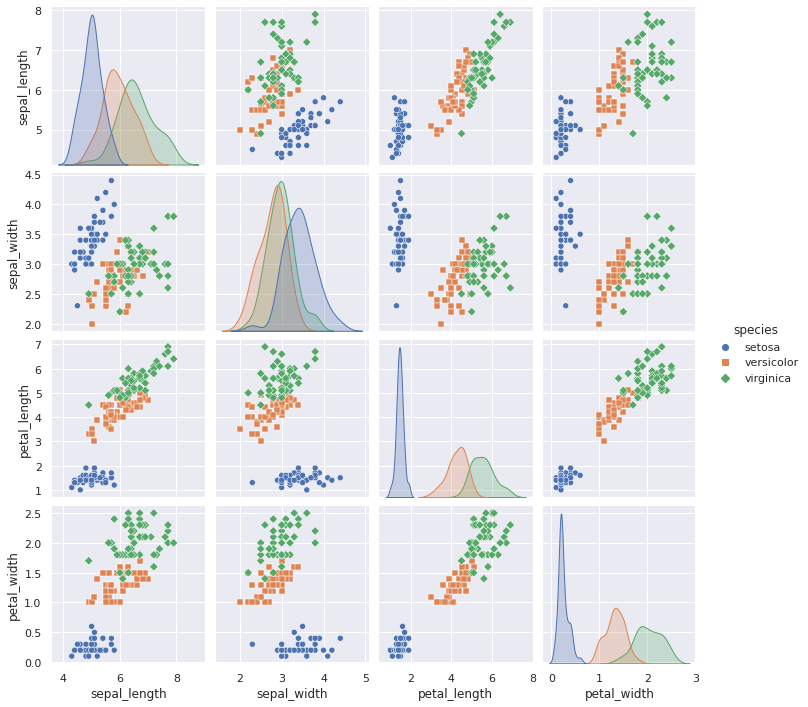

In [157]:
ax = sns.pairplot(iris, hue="species", markers=["o", "s", "D"])

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


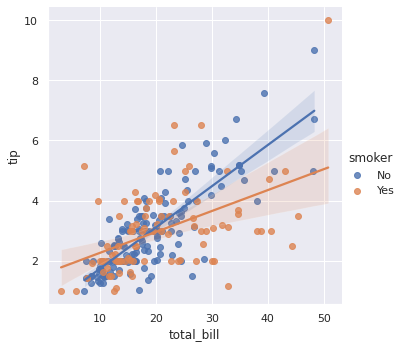

In [159]:
# Regression plots 回归图
# Implot 回归图
# 数据分析的目的就是衡量变量之间的关系，
# Implot()能够绘制二维散点图，并且自动完成拟合回归
# seaborn.lmplot(x, y, data, hue=None, col=None, row=None, palette=None, 
# col_wrap=None, height=5, aspect=1, markers='o', sharex=True, sharey=True, 
# hue_order=None, col_order=None, row_order=None, legend=True, legend_out=True, 
# x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, 
# n_boot=1000, units=None, order=1, logistic=False, lowess=False, robust=False, 
# logx=False, x_partial=None, y_partial=None, truncate=False, x_jitter=None, 
# y_jitter=None, scatter_kws=None, line_kws=None, size=None)
# col, row： 和前面一样，根据所指定属性在列，行上分类
# col_wrap: 指定每行的列数，最多等于col参数所对应的不同类别的数量
# aspect: 控制图的长宽比;
# x_jitter, y_jitter: 给x, y轴随机增加噪音点，设置这两个参数不影响最后的回归直线
# order: 多项式回归，控制进行回归的幂次，设定指数，可以用多项式拟合
# logistic: 逻辑回归
# robust: 如果是True, 使用statsmodels来估计一个文件的回归（鲁棒线性模型）。
# 这将减少异常值。注意logistic回归和robust回归相较与简单线性回归需要更大的计算量
# 其置信区间的产生也依赖于bootstrap采样，你可以关掉置信区间估计来提高速度（ci=None）;
# lowess: 如果是True, 使用statsmodels来估计一个非参数的模型（局部加权线性回归）。
# 这种方法具有最少的假设，尽管计算是密集型的，但目前无法为这类模型绘制置信区间
# logx: 转化为log（x）
# truncate: 默认情况下，绘制散点图后绘制回归线以填充x轴限制。
# 如果为True，则它将被数据限制所限制
ax = sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

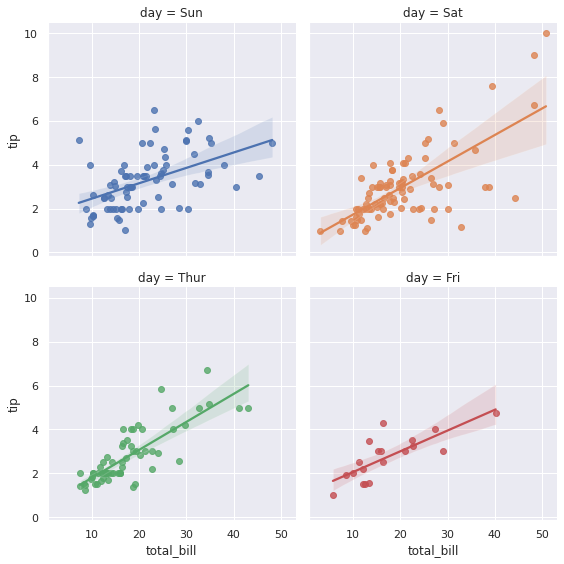

In [162]:
ax = sns.lmplot(x="total_bill", y="tip", col="day", hue="day", data=tips,
               col_wrap=2, height=4)

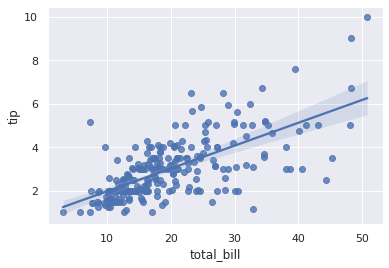

In [163]:
# regplot()
# regplot 和implot 都可以绘制线性回归模型。
# 这两个函数非常相似，甚至共有一些核心功能
g = sns.regplot(x="total_bill", y="tip", data=tips)

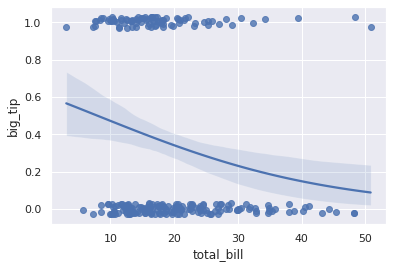

In [165]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .175
ax = sns.regplot(x = "total_bill", y="big_tip", data=tips, 
                 logistic=True, n_boot=500, y_jitter=.03)

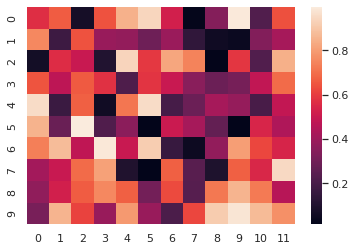

In [166]:
# Matrix plots(矩阵图)
# heatmap(热力图)
# 利用热力图可以看到数据表里多个特征两两的相似读，类似于色彩矩阵。
# seaborn.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, 
# robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', 
# cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', 
# yticklabels='auto', mask=None, ax=None, **kwargs)
# data: 矩阵数据集， 可以使用numpy的数组(array)，如果是pandas的dataframe, 
#    则df的index/colomn信息会分别对应到headmap的columns和rows
# vmax, vmin: 图例中最大值和最小值的显示值，没有该参数时默认不显示;
# cmap: 从数字到色彩空间的映射，取值是matplotlib包里的colormap名称或颜色对象
#    或者便是颜色的列表
# center: 数据表取值有差异时，设置热力图的色彩中心对齐值。通过设置center值，
#    可以调整生成的图像颜色的整体深浅;设置center数据时，如果有数据溢出，
#    则手动设置的vmax, vmin会自动改变
# robust: 默认取值False; 如果是False, 且没设定vmin, vmax的值，
#    热力图的颜色衍射范围根据具有鲁棒性的分位数设定，而不是用极致设定
# annot（annotate的缩写）： 默认取值False, 如果为True, 
#   在热力图每个方格写入数据；如果是矩阵，在热力图每个方格写入该矩阵对应位置数据;
# fmt: 字符串代码格式，矩阵上表示数字的数据格式，比如保留小数点后几位数字
# annot_kws: 默认取值False, 如果为True, 设置热力图矩阵上数字的大小颜色字体
# square: 设置热力图矩阵小块行狂，默认值是False
# xticklabels, yticklabels: 控制每行列标签名的输出。模型值是auto, 
# 自动选择标签的标注间距，将标签名不重叠的部分（或全部）输出。
# 如果是True, 则以DataFrame的列明作为标签
# mask： 控制某个矩阵块是否显示出来。默认值是None。
# 如果是布尔型的DataFrame, 则将DataFrame里True的位置用白色覆盖掉
x = np.random.rand(10, 12)
ax = sns.heatmap(x)

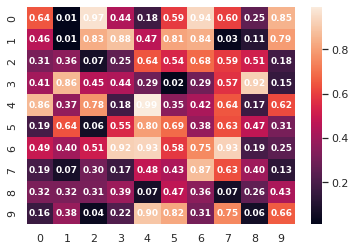

In [168]:
x = np.random.rand(10, 10)
ax = sns.heatmap(x, annot=True, annot_kws={"size": 9, "weight": "bold", "color": "w"}, fmt=".2f")

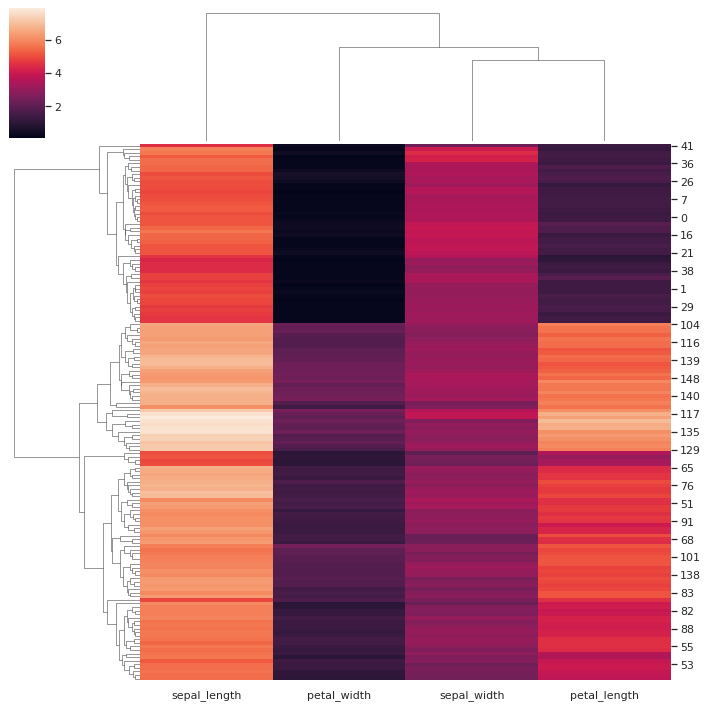

In [169]:
# clustmap(聚类图)
# clustmap()可以将矩阵数据集绘制为层次聚类热图。具体参数如下
# seaborn.clustermap(data, pivot_kws=None, method='average', metric='euclidean', 
#   z_score=None, standard_scale=None, figsize=None, cbar_kws=None, row_cluster=True, 
#   col_cluster=True, row_linkage=None, col_linkage=None, row_colors=None, col_colors=None, 
#   mask=None, **kwargs)
species = iris.pop("species")
g = sns.clustermap(iris)

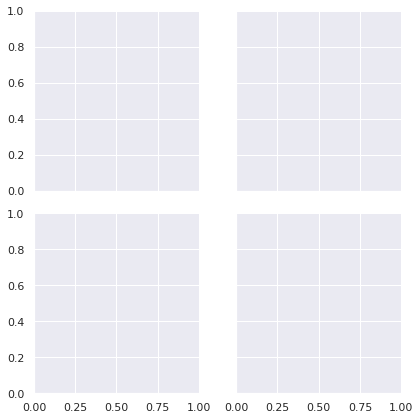

In [170]:
# FacetGrid()
# 在探索中多维数据时，一种有用的方法是在数据集的不同自己上绘制同一个类型图的多个子图。
# 该类将数据集映射到与数据集中变量级别相对应的行和列中排列的多个轴上。
# 它生成的图形通常被称为“格子”或“格子”绘图，可以快速查看到有关复杂数据的大量信息

# FacetGrid当您想要在数据集的自己中分别可视化变量的分布或多个变量之间的关系时非常有用
# 一个FacetGrid可以与多达三个维度可以得出： row, col和hue。
# 前两个与得到的轴阵列有明显对应关系，将huw变量视为沿深度轴的第三个维度，
# 其中不同的级别用不同的颜色绘制。通过使用FacetGrid数据框初始化对象以及将形成网格
# 的行，列或hue维度的变量名称来使用该类。这些变量hue应该是分类的或离散的，
# 然后变量的每个级别的数据将用于沿该轴的小平面。

# seaborn.FacetGrid(data, row=None, col=None, hue=None, col_wrap=None, 
# sharex=True, sharey=True, height=3, aspect=1, palette=None, 
# row_order=None, col_order=None, hue_order=None, hue_kws=None, 
# dropna=True, legend_out=True, despine=True, margin_titles=False, 
# xlim=None, ylim=None, subplot_kws=None, gridspec_kws=None, size=None)

ax = sns.FacetGrid(tips, col="time", row="smoker")

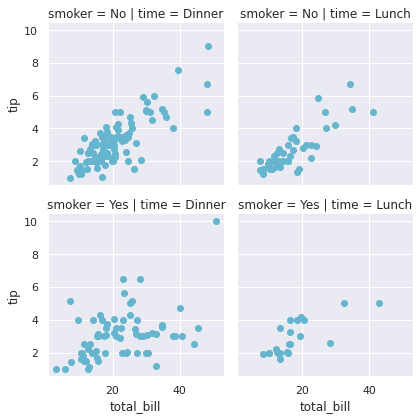

In [172]:
import matplotlib.pyplot as plt
ax = ax.map(plt.scatter, "total_bill", "tip", color="c")

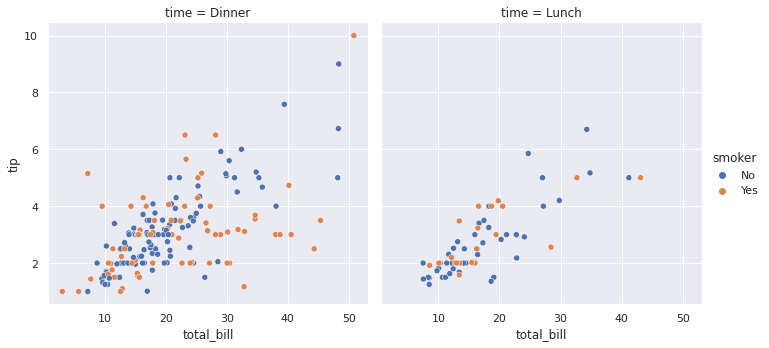

In [174]:
# 比较Facet.map和relplot，catplot, implot绘图的区别
sns.relplot(x="total_bill", y="tip", color="c", col="time", 
           hue="smoker", data=tips)

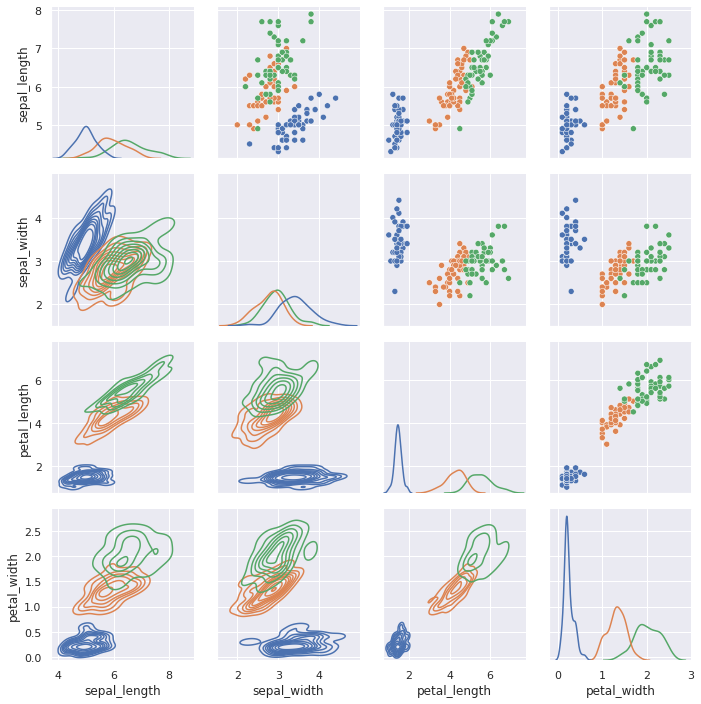

In [181]:
# PairGrid 用于绘制数据集中成对关系的子图网格。
# 该类将数据集中的每个变量因设到多轴网格中的列和行。
# 不同的轴级绘图函数可用于绘制上、下三角形的二元图解，并可在对角线上显示每个变量的边缘分布。
# PairGrid和pairplot从原理来说是一下的，
# 但前面pairplot绘制的图像上下三角形关于主对角线对称， 
# 而PairGrid则可修改上、下三角形和主对角线的图像形状。
iris = pd.read_csv("/home/zjw/zjw/seaborn-data/iris.csv")
iris.head()
ax = sns.PairGrid(iris, hue="species")
ax = ax.map_upper(sns.scatterplot) # 对角线上画散点图, 双边量绘图
ax = ax.map_lower(sns.kdeplot, color='r') # 对角线下核函数绘图， 双边量绘图
ax = ax.map_diag(sns.kdeplot) # 单变量绘图

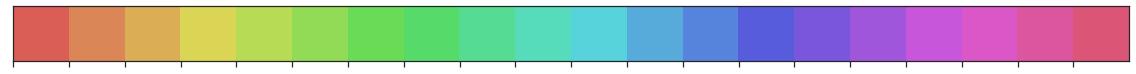

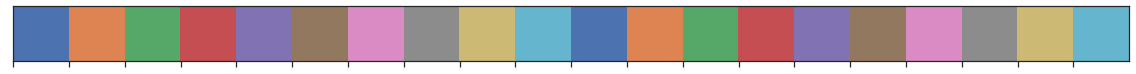

In [186]:
# 主题和颜色
sns.set_style("whitegrid")  # 白色网格背景
sns.set_style("darkgrid")   # 灰色网格背景
sns.set_style("dark")       # 灰色背景
sns.set_style("white")      # 白色背景
sns.set_style("ticks")      # 四周加边框和刻度

# 环境
sns.plotting_context("notebook")  # 默认
sns.plotting_context("paper")
sns.plotting_context("talk")
sns.plotting_context("poster")

# 颜色
sns.palplot(sns.hls_palette(n_colors=20))
sns.palplot(sns.color_palette(n_colors=20))